In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


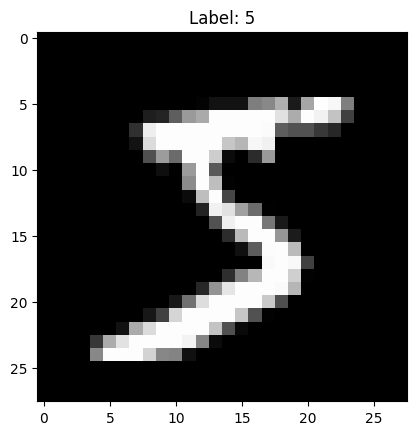

In [6]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shape
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Visualize a sample image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [7]:
# Normalize image data to 0-1 range
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [8]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 1D array
    Dense(128, activation='relu'), # Hidden layer with 128 neurons
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer for 10 digits
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8647 - loss: 0.4601 - val_accuracy: 0.9523 - val_loss: 0.1611
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9641 - loss: 0.1165 - val_accuracy: 0.9673 - val_loss: 0.1111
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9767 - loss: 0.0753 - val_accuracy: 0.9672 - val_loss: 0.1139
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0543 - val_accuracy: 0.9723 - val_loss: 0.0951
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0418 - val_accuracy: 0.9718 - val_loss: 0.1012
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9895 - loss: 0.0335 - val_accuracy: 0.9747 - val_loss: 0.0947
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9910 - loss: 0.0265 - val_accuracy: 0.9718 - val_loss: 0.1063
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9934 - loss: 0.0204 -

In [10]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 97.20%


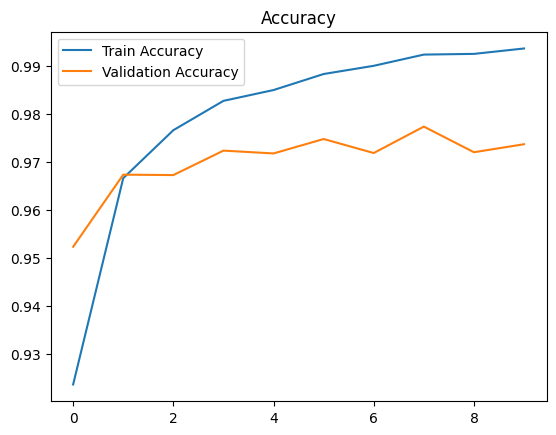

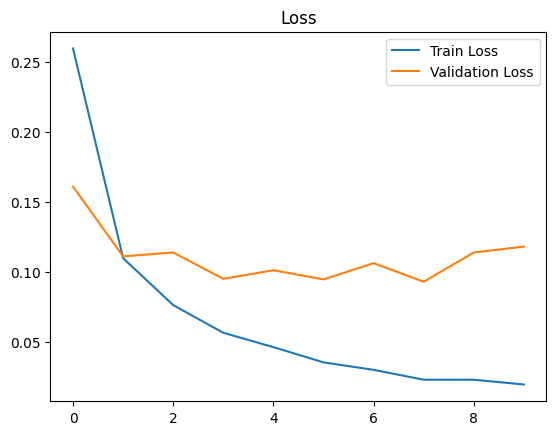

In [11]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


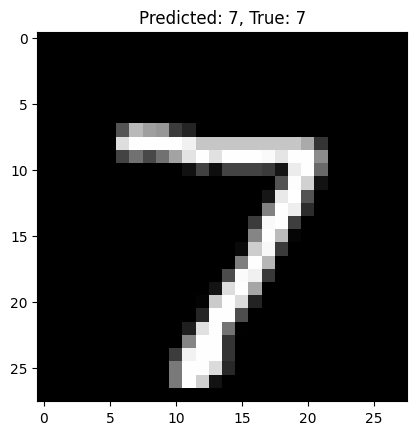

In [12]:
# Predict on a single image
sample_index = 0  # Change index to test different samples
sample_image = x_test[sample_index].reshape(1, 28, 28)
prediction = model.predict(sample_image)

# Display prediction
plt.imshow(x_test[sample_index], cmap='gray')
plt.title(f"Predicted: {np.argmax(prediction)}, True: {np.argmax(y_test[sample_index])}")
plt.show()


In [13]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9944 - loss: 0.0159 - val_accuracy: 0.9772 - val_loss: 0.1045
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9743 - val_loss: 0.1198
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9962 - loss: 0.0117 - val_accuracy: 0.9768 - val_loss: 0.1237
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9957 - loss: 0.0131 - val_accuracy: 0.9749 - val_loss: 0.1372
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9959 - loss: 0.0133 - val_accuracy: 0.9742 - val_loss: 0.1361
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9968 - loss: 0.0092 - val_accuracy: 0.9732 - val_loss: 0.1500
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9963 - loss: 0.0106 - val_accuracy: 0.9769 - val_loss: 0.1331
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9976 - loss: 0.0073 

In [14]:
from tensorflow.keras.layers import LeakyReLU

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [16]:
history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_split=0.2)


ValueError: You must call `compile()` before using the model.

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_split=0.2)


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8732 - loss: 0.4210 - val_accuracy: 0.9579 - val_loss: 0.1362
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9670 - loss: 0.1064 - val_accuracy: 0.9685 - val_loss: 0.1044
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9788 - loss: 0.0699 - val_accuracy: 0.9705 - val_loss: 0.1057
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9819 - loss: 0.0556 - val_accuracy: 0.9703 - val_loss: 0.1046
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9877 - loss: 0.0385 - val_accuracy: 0.9715 - val_loss: 0.1060
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9885 - loss: 0.0344 - val_accuracy: 0.9678 - val_loss: 0.1243
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9909 - loss: 0.0262 - val_accuracy: 0.9726 - val_loss: 0.0976
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9928 - loss: 0

In [19]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)



Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9939 - loss: 0.0231 - val_accuracy: 0.9812 - val_loss: 0.0919
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9964 - loss: 0.0117 - val_accuracy: 0.9817 - val_loss: 0.0982
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9964 - loss: 0.0111 - val_accuracy: 0.9777 - val_loss: 0.1124
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9828 - val_loss: 0.0963
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9970 - loss: 0.0086 - val_accuracy: 0.9807 - val_loss: 0.1002
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9969 - loss: 0.0086 - val_accuracy: 0.9813 - val_loss: 0.0980
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9987 - loss: 0.0050 - val_accuracy: 0.9798 - val_loss: 0.1144
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9962 - loss: 0.01

In [20]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9977 - loss: 0.0069 - val_accuracy: 0.9835 - val_loss: 0.1167
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9986 - loss: 0.0050 - val_accuracy: 0.9823 - val_loss: 0.1133
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9988 - loss: 0.0039 - val_accuracy: 0.9770 - val_loss: 0.1416
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9986 - loss: 0.0042 - val_accuracy: 0.9795 - val_loss: 0.1490
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9979 - loss: 0.0068 - val_accuracy: 0.9832 - val_loss: 0.1226
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9833 - val_loss: 0.1223
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9805 - val_loss: 0.1361
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9979 - loss: 0.0065

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3)
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop])



Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9981 - loss: 0.0053 - val_accuracy: 0.9894 - val_loss: 0.0816
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9850 - val_loss: 0.1054
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9978 - loss: 0.0064 - val_accuracy: 0.9864 - val_loss: 0.1076
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9893 - val_loss: 0.0861


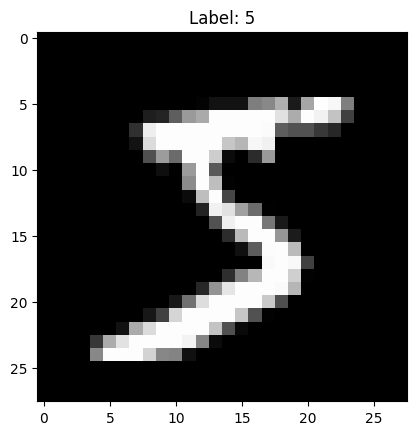

In [22]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.show()


In [90]:
# Save the model in Keras native format
model.save('model.keras')
print("Model saved in Keras native format as 'model.keras'")


Model saved in Keras native format as 'model.keras'


In [91]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('model.keras')
print("Model loaded successfully!")


Model loaded successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [92]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Save the model after compilation
model.save('model.keras')
print("Model compiled and saved successfully!")


Model compiled and saved successfully!


In [93]:
!ls


kezia.png  model.keras	predictions.csv  sample_data  test.csv	train.csv


In [ ]:
# Save model
model.save("mnist_model.h5")

# Load model (if needed)
from tensorflow.keras.models import load_model
loaded_model = load_model("mnist_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


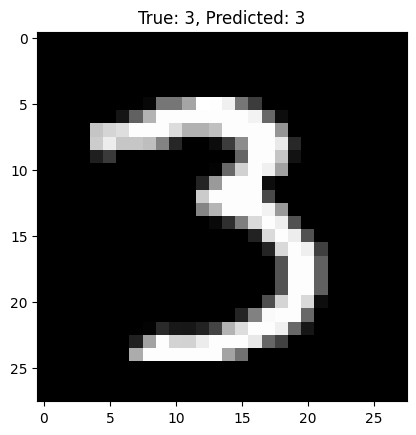

In [27]:
import random

# Pick a random index from the test set
random_index = random.randint(0, len(x_test) - 1)

# Get the image and true label
random_image = x_test[random_index].reshape(1, 28, 28)  # Reshape for prediction
true_label = np.argmax(y_test[random_index])

# Predict the label
predicted_label = np.argmax(model.predict(random_image))

# Display the image and prediction
plt.imshow(x_test[random_index], cmap='gray')
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


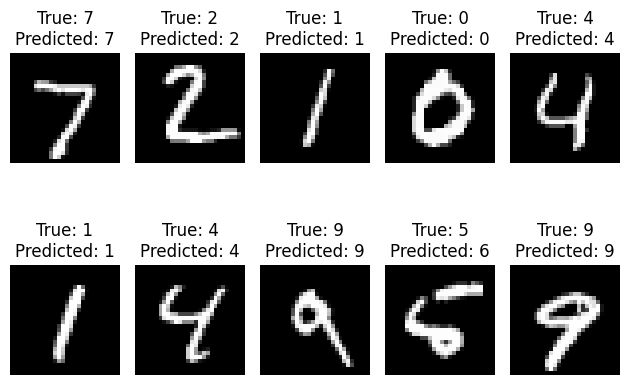

In [28]:
# Predict on the first 10 test images
predictions = model.predict(x_test[:10])

# Display results
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}\nPredicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


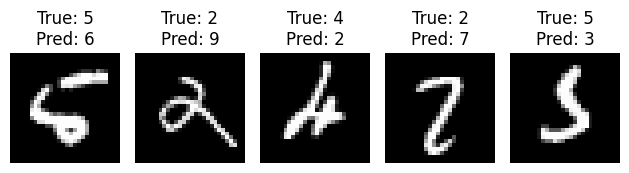

In [29]:
# Get predictions for all test images
all_predictions = model.predict(x_test)

# Find incorrect predictions
incorrect_indices = [i for i in range(len(x_test)) if np.argmax(all_predictions[i]) != np.argmax(y_test[i])]

# Display a few incorrect predictions
for i, index in enumerate(incorrect_indices[:5]):  # Display first 5 incorrect predictions
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"True: {np.argmax(y_test[index])}\nPred: {np.argmax(all_predictions[index])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2)

# Take a sample image from the test set
sample_image = x_test[0].reshape(1, 28, 28, 1)  # Add channel dimension for augmentation

# Generate augmented versions
augmented_images = [datagen.flow(sample_image, batch_size=1).next()[0].reshape(28, 28) for _ in range(5)]

# Predict on augmented images
for i, aug_img in enumerate(augmented_images):
    pred = np.argmax(model.predict(aug_img.reshape(1, 28, 28, 1)))
    plt.subplot(1, 5, i+1)
    plt.imshow(aug_img, cmap='gray')
    plt.title(f"Predicted: {pred}")
    plt.axis('off')
plt.tight_layout()
plt.show()



AttributeError: 'NumpyArrayIterator' object has no attribute 'next'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Digit 0: 0.00
Digit 1: 0.00
Digit 2: 0.00
Digit 3: 0.00
Digit 4: 0.00
Digit 5: 0.00
Digit 6: 0.00
Digit 7: 1.00
Digit 8: 0.00
Digit 9: 0.00


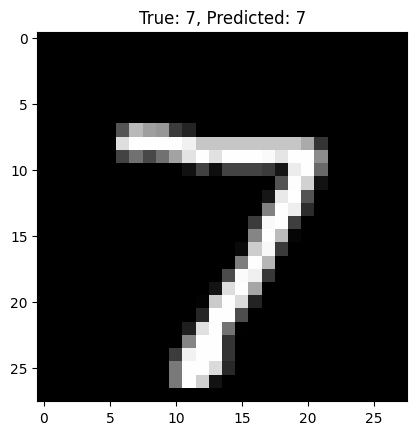

In [30]:
# Test a single image
sample_index = 0
sample_image = x_test[sample_index].reshape(1, 28, 28)

# Get prediction probabilities
confidence_scores = model.predict(sample_image)

# Display confidence scores
for i, score in enumerate(confidence_scores[0]):
    print(f"Digit {i}: {score:.2f}")

# Display the image
plt.imshow(x_test[sample_index], cmap='gray')
plt.title(f"True: {np.argmax(y_test[sample_index])}, Predicted: {np.argmax(confidence_scores)}")
plt.show()


In [31]:
# Test a single image
sample_index = 0
sample_image = x_test[sample_index].reshape(1, 28, 28, 1)  # Add channel dimension

# Get prediction probabilities
confidence_scores = model.predict(sample_image)

# Display confidence scores
for i, score in enumerate(confidence_scores[0]):
    print(f"Digit {i}: {score:.2f}")

# Display the image
plt.imshow(x_test[sample_index].reshape(28, 28), cmap='gray')  # Reshape for display
plt.title(f"True: {np.argmax(y_test[sample_index])}, Predicted: {np.argmax(confidence_scores)}")
plt.show()


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
# Test a single image
sample_index = 0

# Add the batch and channel dimensions
sample_image = x_test[sample_index].reshape(1, 28, 28, 1)  # (batch_size, height, width, channels)

# Get prediction probabilities
confidence_scores = model.predict(sample_image)

# Display confidence scores
for i, score in enumerate(confidence_scores[0]):
    print(f"Digit {i}: {score:.2f}")

# Display the image
plt.imshow(x_test[sample_index].reshape(28, 28), cmap='gray')  # Remove extra dimensions for display
plt.title(f"True: {np.argmax(y_test[sample_index])}, Predicted: {np.argmax(confidence_scores)}")
plt.show()


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
# Test a single image
sample_index = 0

# Add the batch and channel dimensions
sample_image = x_test[sample_index].reshape(1, 28, 28, 1)  # (batch_size, height, width, channels)

# Get prediction probabilities
confidence_scores = model.predict(sample_image)

# Display confidence scores
for i, score in enumerate(confidence_scores[0]):
    print(f"Digit {i}: {score:.2f}")

# Display the image
plt.imshow(x_test[sample_index].reshape(28, 28), cmap='gray')  # Remove extra dimensions for display
plt.title(f"True: {np.argmax(y_test[sample_index])}, Predicted: {np.argmax(confidence_scores)}")
plt.show()


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [32]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Digit 0: 0.00
Digit 1: 0.00
Digit 2: 0.00
Digit 3: 0.00
Digit 4: 0.00
Digit 5: 0.00
Digit 6: 0.00
Digit 7: 1.00
Digit 8: 0.00
Digit 9: 0.00


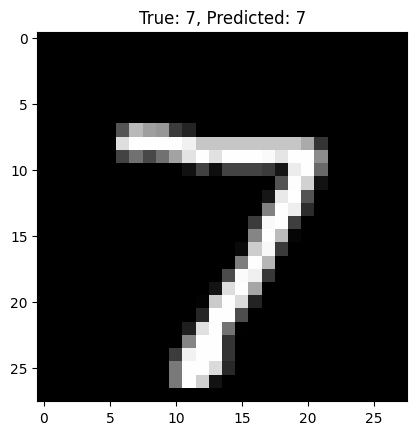

In [33]:
# Test a single image
sample_index = 0

# Reshape to include the batch dimension (model expects (batch_size, 28, 28))
sample_image = x_test[sample_index].reshape(1, 28, 28)  # No channel dimension

# Get prediction probabilities
confidence_scores = model.predict(sample_image)

# Display confidence scores
for i, score in enumerate(confidence_scores[0]):
    print(f"Digit {i}: {score:.2f}")

# Display the image
plt.imshow(x_test[sample_index], cmap='gray')  # Original shape for display
plt.title(f"True: {np.argmax(y_test[sample_index])}, Predicted: {np.argmax(confidence_scores)}")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

# After uploading, you can access the image using its filename.
# For example, if you uploaded 'custom_image.png', use the filename as below:
image_path = 'custom_image.png'  # Replace with the actual filename


Saving custom_digit.png to custom_digit.png


In [ ]:
import cv2  # For image processing
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the custom image (replace 'custom_image.png' with your image path)
# Convert it to grayscale and resize it to 28x28 pixels
custom_image = cv2.imread('custom_image.png', cv2.IMREAD_GRAYSCALE)
custom_image = cv2.resize(custom_image, (28, 28))

# 2. Preprocess the image:
# Normalize the image to the range [0, 1] and reshape to add batch dimension
custom_image = custom_image / 255.0  # Normalize
custom_image = custom_image.reshape(1, 28, 28)  # Add batch dimension

# 3. Make predictions
confidence_scores = model.predict(custom_image)

# 4. Display the confidence scores
for i, score in enumerate(confidence_scores[0]):
    print(f"Digit {i}: {score:.2f}")

# 5. Display the custom image and show the predicted label
predicted_label = np.argmax(confidence_scores)  # Get the predicted digit
plt.imshow(custom_image.reshape(28, 28), cmap='gray')  # Reshape back for display
plt.title(f"Predicted: {predicted_label}")
plt.show()



error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
import cv2  # OpenCV for image processing

# 1. Load the image (replace 'image_path' with the correct path to your image)
image = cv2.imread(image_path)

# 2. Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Resize the image to 28x28 pixels
resized_image = cv2.resize(gray_image, (28, 28))

# 4. Display the resized grayscale image
import matplotlib.pyplot as plt
plt.imshow(resized_image, cmap='gray')
plt.title("Resized Grayscale Image")
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
print(image_path)


custom_image.png


In [ ]:
if image is None:
    print("Image not found or unable to load")
else:
    print("Image loaded successfully")


Image not found or unable to load


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the image file


KeyboardInterrupt: 

In [ ]:
import cv2

# Load the image image_path = 'cx"png'  # Replace with your actual image path
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print("Error: Unable to load image. Check the file path.")
else:
    print("Image loaded successfully!")
    # Proceed with the grayscale conversion and resizing
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, (28, 28))

    # Display the resized grayscale image
    import matplotlib.pyplot as plt
    plt.imshow(resized_image, cmap='gray')
    plt.title("Resized Grayscale Image")
    plt.show()


Error: Unable to load image. Check the file path.


In [1]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the image


Saving kezia.png to kezia.png


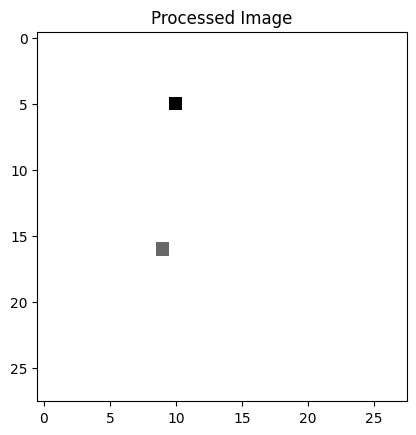

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace with your uploaded file name
image_path = 'kezia.png'  # Replace with the actual image file name

# Load the image
image = cv2.imread(image_path)

# Check if the image loaded correctly
if image is None:
    print("Error: Unable to load the image. Check the file path.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(gray_image, (28, 28))

    # Normalize the pixel values (scale to range [0, 1])
    normalized_image = resized_image / 255.0

    # Reshape to (1, 28, 28) as required by the model
    input_image = normalized_image.reshape(1, 28, 28)

    # Display the processed image
    plt.imshow(resized_image, cmap='gray')
    plt.title("Processed Image")
    plt.show()


In [3]:
# Get the predicted class
predicted_class = np.argmax(model.predict(input_image))
print(f"Predicted Class: {predicted_class}")


NameError: name 'model' is not defined

In [4]:
!ls



kezia.png  sample_data


In [38]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the image


Saving kezia.png to kezia (2).png


In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace with your uploaded file name
image_path = 'your_image.png'  # Replace with the actual image file name

# Load the image
image = cv2.imread(image_path)

# Check if the image loaded correctly
if image is None:
    print("Error: Unable to load the image. Check the file path.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(gray_image, (28, 28))

    # Normalize the pixel values (scale to range [0, 1])
    normalized_image = resized_image / 255.0

    # Reshape to (1, 28, 28) as required by the model
    input_image = normalized_image.reshape(1, 28, 28)

    # Display the processed image
    plt.imshow(resized_image, cmap='gray')
    plt.title("Processed Image")
    plt.show()


Error: Unable to load the image. Check the file path.


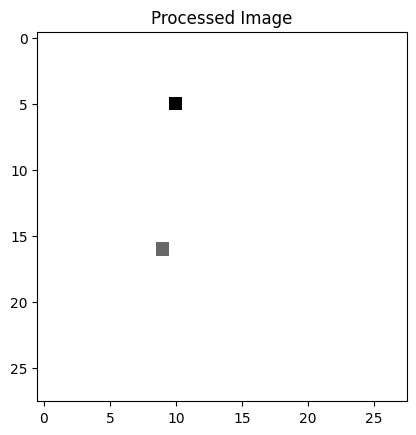

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace with your uploaded file name
image_path = 'kezia.png'  # Replace with the actual image file name

# Load the image
image = cv2.imread(image_path)

# Check if the image loaded correctly
if image is None:
    print("Error: Unable to load the image. Check the file path.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(gray_image, (28, 28))

    # Normalize the pixel values (scale to range [0, 1])
    normalized_image = resized_image / 255.0

    # Reshape to (1, 28, 28) as required by the model
    input_image = normalized_image.reshape(1, 28, 28)

    # Display the processed image
    plt.imshow(resized_image, cmap='gray')
    plt.title("Processed Image")
    plt.show()


In [64]:
# Get the predicted class
predicted_class = np.argmax(model.predict(input_image))
print(f"Predicted Class: {predicted_class}")


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [42]:
print(input_image.shape)  # Should be (1, 28, 28) or (1, 28, 28, 1)


(1, 28, 28)


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

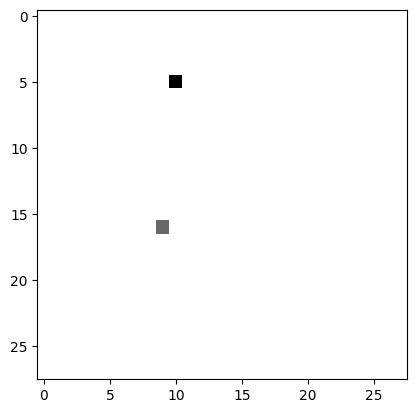

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Display the image
plt.imshow(input_image[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(model.predict(input_image))}")
plt.show()

# Show the confidence scores
confidence_scores = model.predict(input_image)
for i, score in enumerate(confidence_scores[0]):
    print(f"Digit {i}: {score:.4f}")


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)  # Augment training data
model.fit(datagen.flow(x_train, y_train), epochs=10, validation_data=(x_test, y_test))


ValueError: Input to `.fit()` should have rank 4. Got array with shape: (60000, 28, 28)

In [45]:
# Reshape to add the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize the pixel values (optional, if not already done)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the data augmentation generator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1)

# Fit the generator to the training data
datagen.fit(x_train)

# Train the model using augmented data
model.fit(datagen.flow(x_train, y_train), epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 10), output.shape=(None, 10)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split


In [48]:
# Load the CSV file (adjust the path to your dataset location)
data = pd.read_csv('train.csv')  # Replace with the correct file name


In [49]:
# Separate features (pixels) and labels
X = data.drop('label', axis=1).values  # Drop the 'label' column
y = data['label'].values  # The 'label' column contains the target digit labels

# Reshape X to (num_samples, 28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7089 - loss: 0.9429 - val_accuracy: 0.9541 - val_loss: 0.1469
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9653 - loss: 0.1180 - val_accuracy: 0.9651 - val_loss: 0.1025
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9767 - loss: 0.0780 - val_accuracy: 0.9692 - val_loss: 0.1016
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9842 - loss: 0.0470 - val_accuracy: 0.9686 - val_loss: 0.0874
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9888 - loss: 0.0384 - val_accuracy: 0.9738 - val_loss: 0.0806
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9916 - loss: 0.0245 - val_accuracy: 0.9657 - val_loss: 0.1116
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9949 - loss: 0.0164 - val_accuracy: 0.9785 - val_loss: 0.0681
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9935 - loss: 0.0164 - val_a

In [52]:
model.save()

TypeError: Model.save() missing 1 required positional argument: 'filepath'

In [56]:
import pandas as pd

# Load the test CSV file
test_data = pd.read_csv('test.csv')

# Display the first few rows of the CSV
print(test_data.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [57]:
import numpy as np

# Convert the data to a NumPy array and reshape it
x_test = test_data.to_numpy()  # Convert to NumPy array
x_test = x_test / 255.0  # Normalize the data to [0, 1]

# Reshape the data to match the input shape of the model (28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)  # Add channel dimension for grayscale


In [58]:
# Use the model to predict the class labels
predictions = model.predict(x_test)

# Get the predicted class labels (the digit with the highest probability)
predicted_classes = np.argmax(predictions, axis=1)

# Print the predictions
print(predicted_classes)


875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step
[2 0 9 ... 3 9 2]


In [59]:
# Save the predictions to a new CSV file
output = pd.DataFrame({'Prediction': predicted_classes})
output.to_csv('predictions.csv', index=False)


In [60]:
# Display the predictions alongside the image index (optional)
for i, pred in enumerate(predicted_classes):
    print(f"Image {i}: Predicted digit: {pred}")


Streaming output truncated to the last 5000 lines.
Image 23000: Predicted digit: 4
Image 23001: Predicted digit: 6
Image 23002: Predicted digit: 7
Image 23003: Predicted digit: 4
Image 23004: Predicted digit: 6
Image 23005: Predicted digit: 9
Image 23006: Predicted digit: 6
Image 23007: Predicted digit: 4
Image 23008: Predicted digit: 7
Image 23009: Predicted digit: 8
Image 23010: Predicted digit: 8
Image 23011: Predicted digit: 0
Image 23012: Predicted digit: 3
Image 23013: Predicted digit: 2
Image 23014: Predicted digit: 4
Image 23015: Predicted digit: 6
Image 23016: Predicted digit: 0
Image 23017: Predicted digit: 6
Image 23018: Predicted digit: 6
Image 23019: Predicted digit: 5
Image 23020: Predicted digit: 0
Image 23021: Predicted digit: 5
Image 23022: Predicted digit: 1
Image 23023: Predicted digit: 5
Image 23024: Predicted digit: 7
Image 23025: Predicted digit: 7
Image 23026: Predicted digit: 3
Image 23027: Predicted digit: 7
Image 23028: Predicted digit: 0
Image 23029: Predicte

In [61]:
for i in range(10):
    print(f"Image {i}: Predicted: {predicted_classes[i]}, True: {y_test[i]}")


Image 0: Predicted: 2, True: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Image 1: Predicted: 0, True: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Image 2: Predicted: 9, True: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Image 3: Predicted: 9, True: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Image 4: Predicted: 3, True: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Image 5: Predicted: 7, True: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Image 6: Predicted: 0, True: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Image 7: Predicted: 3, True: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Image 8: Predicted: 0, True: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Image 9: Predicted: 3, True: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


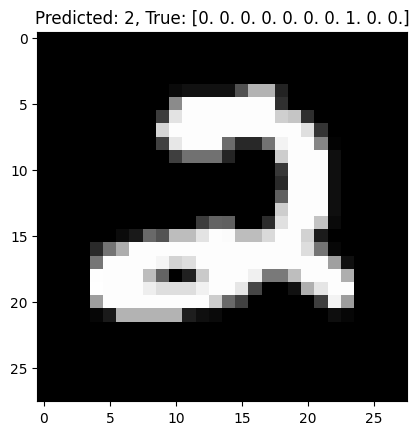

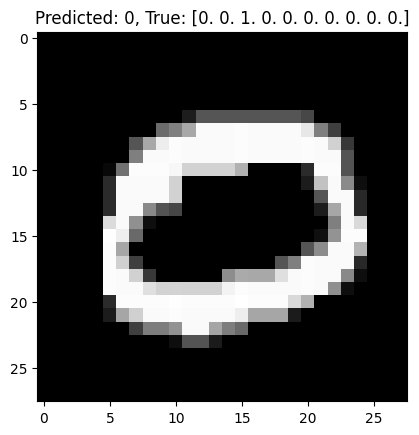

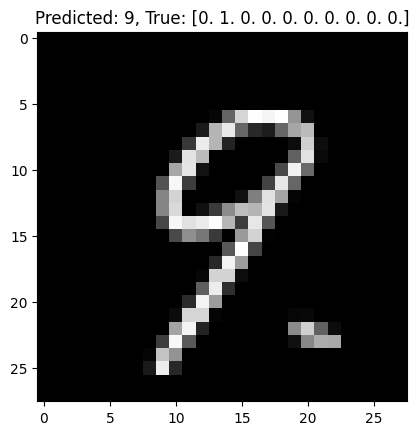

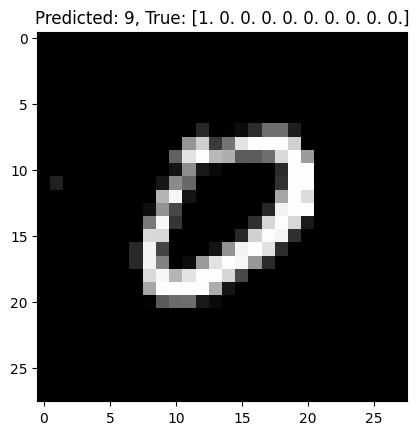

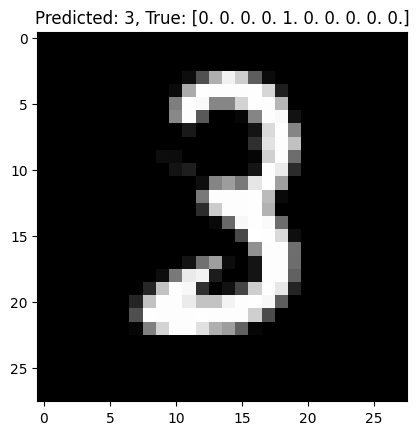

In [62]:
import matplotlib.pyplot as plt

# Display the first few images and their predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, True: {y_test[i]}")
    plt.show()


In [87]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the image


Saving kezia.png to kezia.png


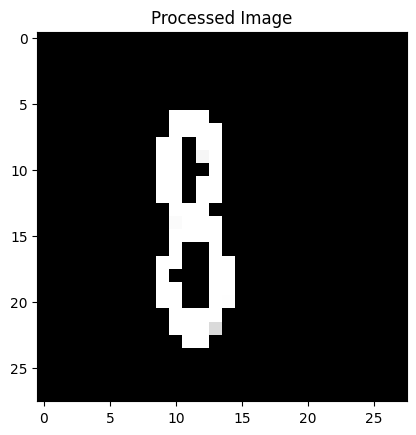

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace with your uploaded file name
image_path = 'kezia.png'  # Replace with the actual image file name

# Load the image
image = cv2.imread(image_path)

# Check if the image loaded correctly
if image is None:
    print("Error: Unable to load the image. Check the file path.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(gray_image, (28, 28))

    # Normalize the pixel values (scale to range [0, 1])
    normalized_image = resized_image / 255.0

    # Reshape to (1, 28, 28) as required by the model
    input_image = normalized_image.reshape(1, 28, 28)

    # Display the processed image
    plt.imshow(resized_image, cmap='gray')
    plt.title("Processed Image")
    plt.show()


In [89]:
# Get the predicted class
predicted_class = np.argmax(model.predict(input_image))
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: 8
